In [1]:
import pandas as pd
df = pd.read_csv('강남구전세데이터_마지막.csv')
df

,보증금(만원),건축년도,구분,전용면적(㎡),층,도로명주소_x,계약시작,계약종료,계약년월일,건축나이,...,행정구,행정구코드,스타벅스 개수_y,미쉐린 개수,맥도날드 개수,대규모점포 개수,전통시장 개수,역세권 개수,금리,유치원 개수
0,7500,1989,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-06-01,2024-06-01,2022-06-01,34,...,개포동,0,0,0,0,0,0,0,4.04,2
1,14333,1991,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-10-01,2024-10-01,2022-10-05,32,...,개포동,0,0,0,0,0,0,0,4.82,2
2,17115,1991,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-07-01,2024-07-01,2022-07-07,32,...,개포동,0,0,0,0,0,0,0,4.16,2
3,17640,1991,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-07-01,2024-07-01,2022-07-07,32,...,개포동,0,0,0,0,0,0,0,4.16,2
4,7500,1989,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-06-01,2024-06-01,2022-06-01,34,...,개포동,0,0,0,0,0,0,0,4.04,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87356,45000,2004,오피스텔,66.64,8.0,서울특별시 강남구 역삼로 432,NaN,NaN,2019-07-22,19,...,대치동,2,3,1,1,1,0,0,2.64,1
87357,38000,2005,오피스텔,43.68,5.0,서울특별시 강남구 압구정로 461,NaN,NaN,2019-06-21,18,...,청담동,13,3,17,0,2,0,0,2.74,1
87358,23500,2014,오피스텔,31.57,5.0,서울특별시 강남구 도산대로 406,NaN,NaN,2019-07-20,9,...,청담동,13,3,31,1,2,0,0,2.64,0
87359,3000,2020,오피스텔,29.51,6.0,서울특별시 강남구 논현로20길 12,NaN,NaN,2020-09-08,3,...,개포동,0,1,0,0,0,0,0,2.44,1


In [2]:
df['전용면적(㎡)'].nunique()

5813

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

In [4]:
import warnings

# 경고 무시하기
warnings.filterwarnings("ignore")
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'# (위도우용)
from matplotlib import font_manager, rc

# AppleGothic 폰트 설정
rc('font', family='AppleGothic')

# 1. 전용면적 특성공학

In [5]:
df['전용면적(㎡)'].describe()

count    87361.000000
mean        67.776567
std         37.183271
min         11.390000
25%         40.560000
50%         59.920000
75%         84.930000
max        301.470000
Name: 전용면적(㎡), dtype: float64

In [6]:
bins = [0, 30, 60, 90, 120, float('inf')]
labels = ['0-30', '30-60', '60-90', '90-120', '120+']
df['전용면적band'] = pd.cut(df['전용면적(㎡)'], bins=bins, labels=labels, include_lowest=True)

In [7]:
df['행정구_전용면적band'] = df['행정구'] + df['전용면적band'].astype(str)

 

# 2. 층 특성공학

In [8]:
df['층'].describe()

count    87361.000000
mean         6.859915
std          5.758265
min         -1.000000
25%          3.000000
50%          5.000000
75%         10.000000
max         67.000000
Name: 층, dtype: float64

In [9]:

df = pd.DataFrame(df)

# Define the bin edges
bins = [-float('inf'), 3, 5, 10, float('inf')]
bin_labels = ['0-3', '3-5', '5-10', '10-67']

# Create a new column 'band' that contains the bin labels
df['층band'] = pd.cut(df['층'], bins=bins, labels=bin_labels, right=False)

df

,보증금(만원),건축년도,구분,전용면적(㎡),층,도로명주소_x,계약시작,계약종료,계약년월일,건축나이,...,미쉐린 개수,맥도날드 개수,대규모점포 개수,전통시장 개수,역세권 개수,금리,유치원 개수,전용면적band,행정구_전용면적band,층band
0,7500,1989,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-06-01,2024-06-01,2022-06-01,34,...,0,0,0,0,0,4.04,2,30-60,개포동30-60,3-5
1,14333,1991,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-10-01,2024-10-01,2022-10-05,32,...,0,0,0,0,0,4.82,2,30-60,개포동30-60,3-5
2,17115,1991,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-07-01,2024-07-01,2022-07-07,32,...,0,0,0,0,0,4.16,2,30-60,개포동30-60,3-5
3,17640,1991,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-07-01,2024-07-01,2022-07-07,32,...,0,0,0,0,0,4.16,2,30-60,개포동30-60,3-5
4,7500,1989,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-06-01,2024-06-01,2022-06-01,34,...,0,0,0,0,0,4.04,2,30-60,개포동30-60,3-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87356,45000,2004,오피스텔,66.64,8.0,서울특별시 강남구 역삼로 432,NaN,NaN,2019-07-22,19,...,1,1,1,0,0,2.64,1,60-90,대치동60-90,5-10
87357,38000,2005,오피스텔,43.68,5.0,서울특별시 강남구 압구정로 461,NaN,NaN,2019-06-21,18,...,17,0,2,0,0,2.74,1,30-60,청담동30-60,5-10
87358,23500,2014,오피스텔,31.57,5.0,서울특별시 강남구 도산대로 406,NaN,NaN,2019-07-20,9,...,31,1,2,0,0,2.64,0,30-60,청담동30-60,5-10
87359,3000,2020,오피스텔,29.51,6.0,서울특별시 강남구 논현로20길 12,NaN,NaN,2020-09-08,3,...,0,0,0,0,0,2.44,1,0-30,개포동0-30,5-10


# 계약년월일 특성공학

In [10]:
df['계약년월일']

0        2022-06-01
1        2022-10-05
2        2022-07-07
3        2022-07-07
4        2022-06-01
            ...    
87356    2019-07-22
87357    2019-06-21
87358    2019-07-20
87359    2020-09-08
87360    2020-11-25
Name: 계약년월일, Length: 87361, dtype: object

In [11]:
date_range = pd.date_range(start='2018-01-01', end='2022-12-31', freq='D')
data = {'계약년월일': date_range}


# '계약년월일' 열을 날짜 형식으로 변환
df['계약년월일'] = pd.to_datetime(df['계약년월일'])

# 분기를 나타내는 새로운 열 생성
df['분기'] = df['계약년월일'].dt.to_period('Q')

df

,보증금(만원),건축년도,구분,전용면적(㎡),층,도로명주소_x,계약시작,계약종료,계약년월일,건축나이,...,맥도날드 개수,대규모점포 개수,전통시장 개수,역세권 개수,금리,유치원 개수,전용면적band,행정구_전용면적band,층band,분기
0,7500,1989,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-06-01,2024-06-01,2022-06-01,34,...,0,0,0,0,4.04,2,30-60,개포동30-60,3-5,2022Q2
1,14333,1991,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-10-01,2024-10-01,2022-10-05,32,...,0,0,0,0,4.82,2,30-60,개포동30-60,3-5,2022Q4
2,17115,1991,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-07-01,2024-07-01,2022-07-07,32,...,0,0,0,0,4.16,2,30-60,개포동30-60,3-5,2022Q3
3,17640,1991,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-07-01,2024-07-01,2022-07-07,32,...,0,0,0,0,4.16,2,30-60,개포동30-60,3-5,2022Q3
4,7500,1989,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-06-01,2024-06-01,2022-06-01,34,...,0,0,0,0,4.04,2,30-60,개포동30-60,3-5,2022Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87356,45000,2004,오피스텔,66.64,8.0,서울특별시 강남구 역삼로 432,NaN,NaN,2019-07-22,19,...,1,1,0,0,2.64,1,60-90,대치동60-90,5-10,2019Q3
87357,38000,2005,오피스텔,43.68,5.0,서울특별시 강남구 압구정로 461,NaN,NaN,2019-06-21,18,...,0,2,0,0,2.74,1,30-60,청담동30-60,5-10,2019Q2
87358,23500,2014,오피스텔,31.57,5.0,서울특별시 강남구 도산대로 406,NaN,NaN,2019-07-20,9,...,1,2,0,0,2.64,0,30-60,청담동30-60,5-10,2019Q3
87359,3000,2020,오피스텔,29.51,6.0,서울특별시 강남구 논현로20길 12,NaN,NaN,2020-09-08,3,...,0,0,0,0,2.44,1,0-30,개포동0-30,5-10,2020Q3


In [12]:
df

,보증금(만원),건축년도,구분,전용면적(㎡),층,도로명주소_x,계약시작,계약종료,계약년월일,건축나이,...,맥도날드 개수,대규모점포 개수,전통시장 개수,역세권 개수,금리,유치원 개수,전용면적band,행정구_전용면적band,층band,분기
0,7500,1989,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-06-01,2024-06-01,2022-06-01,34,...,0,0,0,0,4.04,2,30-60,개포동30-60,3-5,2022Q2
1,14333,1991,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-10-01,2024-10-01,2022-10-05,32,...,0,0,0,0,4.82,2,30-60,개포동30-60,3-5,2022Q4
2,17115,1991,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-07-01,2024-07-01,2022-07-07,32,...,0,0,0,0,4.16,2,30-60,개포동30-60,3-5,2022Q3
3,17640,1991,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-07-01,2024-07-01,2022-07-07,32,...,0,0,0,0,4.16,2,30-60,개포동30-60,3-5,2022Q3
4,7500,1989,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-06-01,2024-06-01,2022-06-01,34,...,0,0,0,0,4.04,2,30-60,개포동30-60,3-5,2022Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87356,45000,2004,오피스텔,66.64,8.0,서울특별시 강남구 역삼로 432,NaN,NaN,2019-07-22,19,...,1,1,0,0,2.64,1,60-90,대치동60-90,5-10,2019Q3
87357,38000,2005,오피스텔,43.68,5.0,서울특별시 강남구 압구정로 461,NaN,NaN,2019-06-21,18,...,0,2,0,0,2.74,1,30-60,청담동30-60,5-10,2019Q2
87358,23500,2014,오피스텔,31.57,5.0,서울특별시 강남구 도산대로 406,NaN,NaN,2019-07-20,9,...,1,2,0,0,2.64,0,30-60,청담동30-60,5-10,2019Q3
87359,3000,2020,오피스텔,29.51,6.0,서울특별시 강남구 논현로20길 12,NaN,NaN,2020-09-08,3,...,0,0,0,0,2.44,1,0-30,개포동0-30,5-10,2020Q3


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87361 entries, 0 to 87360
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   보증금(만원)       87361 non-null  int64         
 1   건축년도          87361 non-null  int64         
 2   구분            87361 non-null  object        
 3   전용면적(㎡)       87361 non-null  float64       
 4   층             87361 non-null  float64       
 5   도로명주소_x       87361 non-null  object        
 6   계약시작          25069 non-null  object        
 7   계약종료          25069 non-null  object        
 8   계약년월일         87361 non-null  datetime64[ns]
 9   건축나이          87361 non-null  int64         
 10  Latitude      87361 non-null  float64       
 11  Longitude     87361 non-null  float64       
 12  행정구           87361 non-null  object        
 13  행정구코드         87361 non-null  int64         
 14  스타벅스 개수_y     87361 non-null  int64         
 15  미쉐린 개수        87361 non-null  int64 

# 키워드: 집과 관련된 지표로 EDA

# 상위 30% 분기-행정구-전용면적band에 따른 보증금은 어떻게 될것인가?

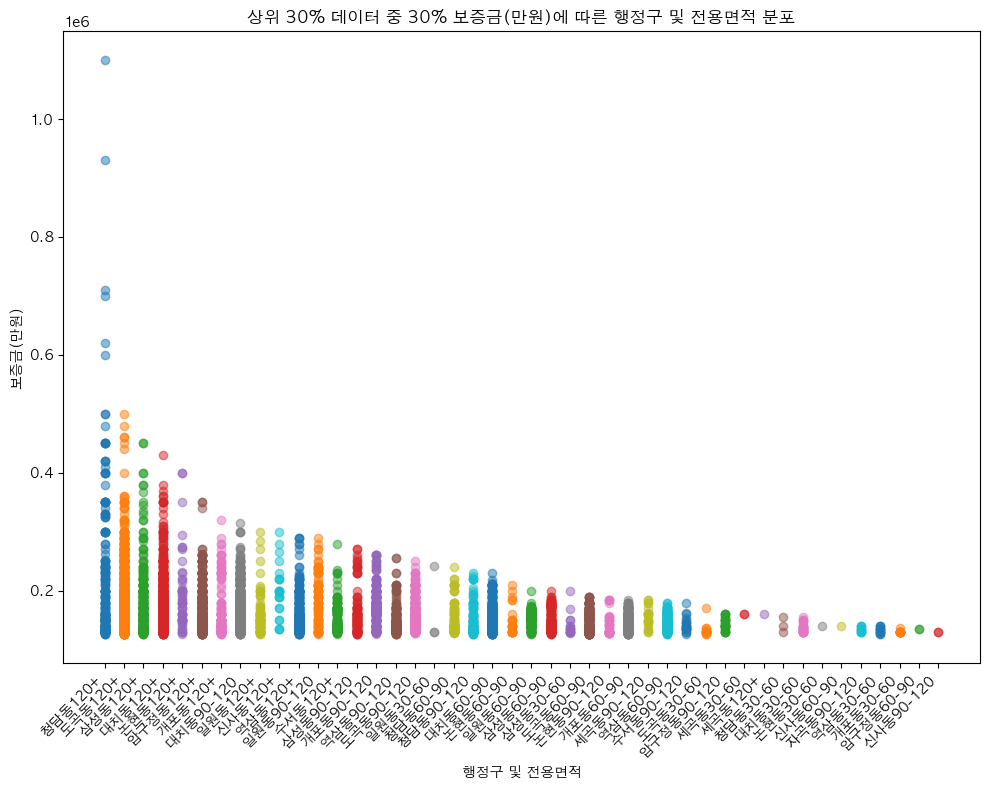

In [83]:
import matplotlib.pyplot as plt

# 보증금(만원)을 기준으로 데이터 정렬
df = df.sort_values(by='보증금(만원)', ascending=False)

# 상위 30%의 데이터만 선택
percentile_30 = int(0.3 * len(df))
top_30_df = df.head(percentile_30)

# 상위 30% 데이터 중 30%만 선택
percentile_30_within_top_30 = int(0.3 * len(top_30_df))
final_df = top_30_df.head(percentile_30_within_top_30)

# 행정구 및 전용면적에 따른 보증금 분포 시각화
plt.figure(figsize=(10, 8))  #
for area in final_df['행정구_전용면적band'].unique():
    subset = final_df[final_df['행정구_전용면적band'] == area]
    plt.scatter(subset['행정구_전용면적band'], subset['보증금(만원)'], label=f'전용면적 {area}㎡', alpha=0.5)

plt.xticks(rotation=45, ha='right')   
plt.xlabel('행정구 및 전용면적')
plt.ylabel('보증금(만원)')
plt.title('상위 30% 데이터 중 30% 보증금(만원)에 따른 행정구 및 전용면적 분포')
plt.tight_layout()

# 시각화 보여주기
plt.show()


In [84]:
import pandas as pd

# 행정구 및 전용면적에 따른 보증금 평균
avg_by_area = final_df.groupby('행정구_전용면적band')['보증금(만원)'].mean()

# 행정구 및 전용면적에 따른 보증금 중앙값
median_by_area = final_df.groupby('행정구_전용면적band')['보증금(만원)'].median()

# 행정구 및 전용면적에 따른 보증금 표준편차
std_by_area = final_df.groupby('행정구_전용면적band')['보증금(만원)'].std()

# 결과 출력을 위해 데이터프레임 생성
result_df = pd.DataFrame({
    '보증금 평균': avg_by_area,
    '보증금 중앙값': median_by_area,
    '보증금 표준편차': std_by_area
})

result_df.reset_index(inplace=True)

In [85]:
result_df

,행정구_전용면적band,보증금 평균,보증금 중앙값,보증금 표준편차
0,개포동120+,161650.602410,140000.0,43419.047624
1,개포동30-60,130466.666667,130000.0,1807.392228
2,개포동60-90,145306.228374,141700.0,14526.959347
3,개포동90-120,173143.822394,170000.0,29577.717894
4,논현동120+,191705.357143,180000.0,61043.987626
5,논현동30-60,140000.000000,140000.0,NaN
6,논현동60-90,148629.629630,140000.0,23685.679133
7,논현동90-120,142793.750000,134875.0,18307.197644
8,대치동120+,175267.150229,162875.0,44945.516126
9,대치동30-60,137200.000000,135000.0,7284.371556


In [86]:
import pandas as pd

# 행정구 및 전용면적에 따른 보증금 통계 계산
statistics_by_area = final_df.groupby('행정구_전용면적band')['보증금(만원)'].agg(['mean', 'median', 'std'])

# '보증금 평균'을 기준으로 내림차순 정렬하여 순위 계산
statistics_by_area = statistics_by_area.sort_values(by='mean', ascending=False)
for column in ['mean','median', 'std']:
    statistics_by_area[f'{column} 순위'] = statistics_by_area[column].rank(ascending=False)

# 'mean', 'median', 'std' 열에만 한국 원화 표기법을 적용하는 함수
def format_korean_won(value):
    return '{:,.0f}억'.format(value / 10000) if isinstance(value, (int, float)) else value

# 'mean', 'median', 'std' 열에만 함수 적용
for column in ['mean', 'median', 'std']:
    statistics_by_area[column] = statistics_by_area[column].apply(format_korean_won)

statistics_by_area


,mean,median,std,mean 순위,median 순위,std 순위
행정구_전용면적band,,,,,,
청담동120+,22억,17억,13억,1.0,5.0,1.0
신사동120+,20억,20억,5억,2.0,1.0,6.0
논현동120+,19억,18억,6억,3.0,3.0,3.0
일원동90-120,19억,18억,4억,4.0,2.0,9.0
도곡동120+,18억,17억,5억,5.0,5.0,5.0
삼성동120+,18억,16억,6억,6.0,7.0,4.0
대치동120+,18억,16억,4억,7.0,8.0,7.0
개포동90-120,17억,17억,3억,8.0,5.0,15.0
일원동30-60,17억,13억,6억,9.0,42.5,2.0


- 평균 보증금 순위 분석: 보증금 평균을 기준으로 내림차순으로 정렬한 결과를 보면, '청담동120+'이 가장 높은 보증금 평균을 가지고 있으며, '신사동120+'과 '논현동120+'이 그 뒤를 이어 나가고 있다.

- 표준편차 분석: 표준편차를 통해 각 행정구 및 전용면적별로 보증금의 변동성을 확인할 수 있다. 표준편차가 높을수록 보증금의 분포가 넓고 불안정한 것을 나타낸다. 데이터에서는 '일원동30-60'이 가장 높은 표준편차를 가지고 있다. 해당 지역의 부동산 시장이 상대적으로 불안정하거나 변동성이 크다는 것을 의미할 수 있다.

- 평균, 중앙값, 표준편차 순위 비교: 평균, 중앙값, 표준편차의 순위를 비교해보면, 각 지역의 부동산 시장 특성을 파악할 수 있습니다. 예를 들어, '일원동30-60'은 평균은 높지 않지만 표준편차가 큰 편이므로 보증금 분포가 넓은 것을 알 수 있다.

- 전용면적에 따른 분석: 전용면적별로 각 통계값을 비교하여 어떤 전용면적이 보증금 평균이 높거나 변동성이 큰지 확인할 수 있다.

In [87]:
df2 = statistics_by_area.reset_index()
df2

,행정구_전용면적band,mean,median,std,mean 순위,median 순위,std 순위
0,청담동120+,22억,17억,13억,1.0,5.0,1.0
1,신사동120+,20억,20억,5억,2.0,1.0,6.0
2,논현동120+,19억,18억,6억,3.0,3.0,3.0
3,일원동90-120,19억,18억,4억,4.0,2.0,9.0
4,도곡동120+,18억,17억,5억,5.0,5.0,5.0
5,삼성동120+,18억,16억,6억,6.0,7.0,4.0
6,대치동120+,18억,16억,4억,7.0,8.0,7.0
7,개포동90-120,17억,17억,3억,8.0,5.0,15.0
8,일원동30-60,17억,13억,6억,9.0,42.5,2.0
9,대치동90-120,17억,16억,3억,10.0,12.0,14.0


In [88]:
df['분기정리'].nunique

<bound method IndexOpsMixin.nunique of 61207   2022-10-01
61206   2021-10-01
61203   2021-01-01
63674   2021-10-01
64271   2022-07-01
           ...    
74377   2018-04-01
8086    2019-01-01
81013   2022-10-01
81549   2021-10-01
65444   2019-01-01
Name: 분기정리, Length: 87361, dtype: datetime64[ns]>

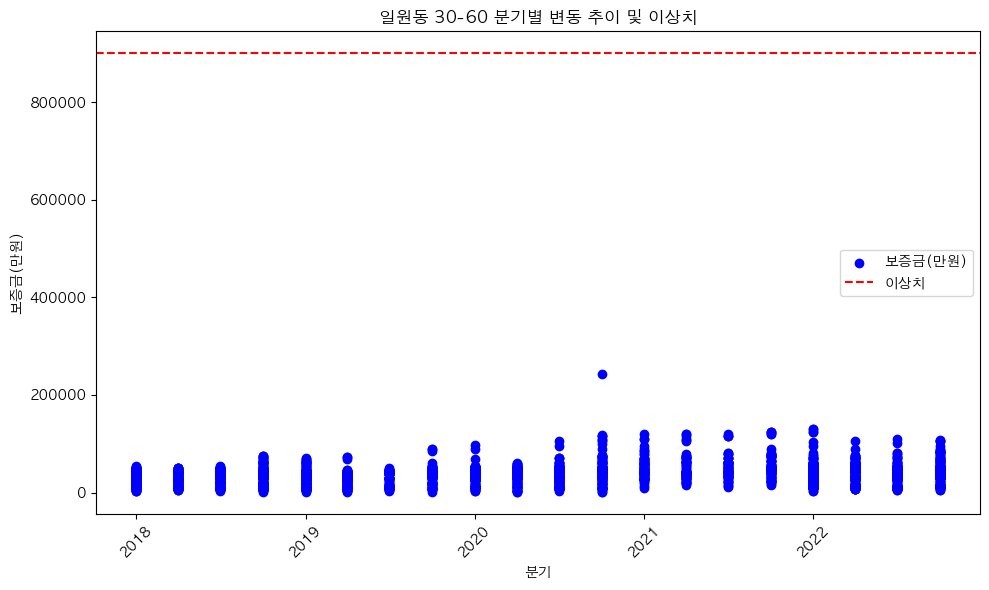

In [31]:

# 필터링: '행정구_전용면적band'가 '일원동30-60'인 데이터 추출
filtered_df = df[df['행정구_전용면적band'] == '일원동30-60']

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['분기정리'], filtered_df['보증금(만원)'], marker='o', color='blue', label='보증금(만원)')
plt.axhline(y=900000, color='red', linestyle='--', label='이상치')
plt.xlabel('분기')
plt.ylabel('보증금(만원)')
plt.title('일원동 30-60 분기별 변동 추이 및 이상치')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

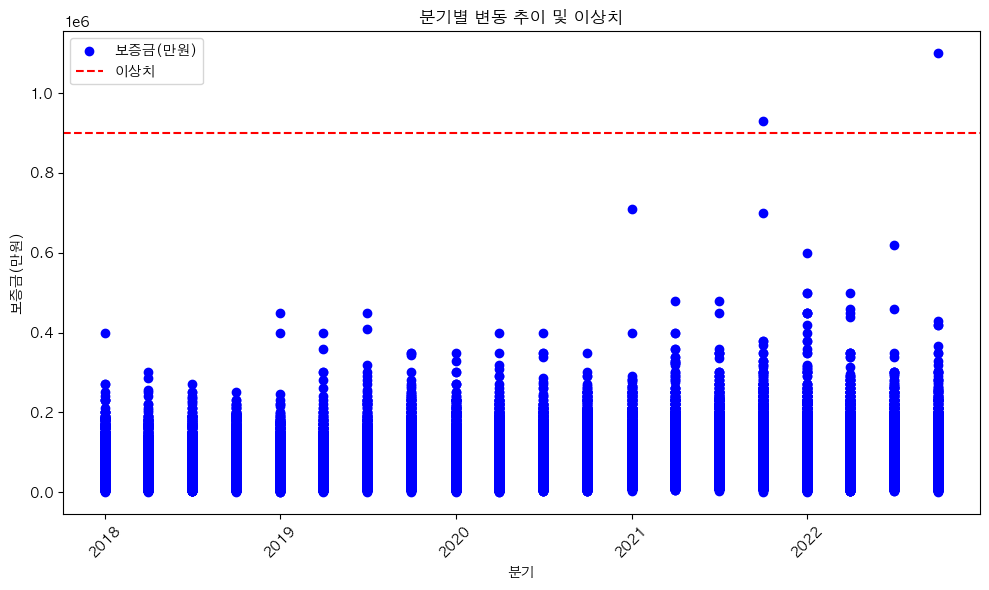

In [37]:

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.scatter(df['분기정리'], df['보증금(만원)'], marker='o', color='blue', label='보증금(만원)')
plt.axhline(y=900000, color='red', linestyle='--', label='이상치')
plt.xlabel('분기')
plt.ylabel('보증금(만원)')
plt.title('분기별 변동 추이 및 이상치')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

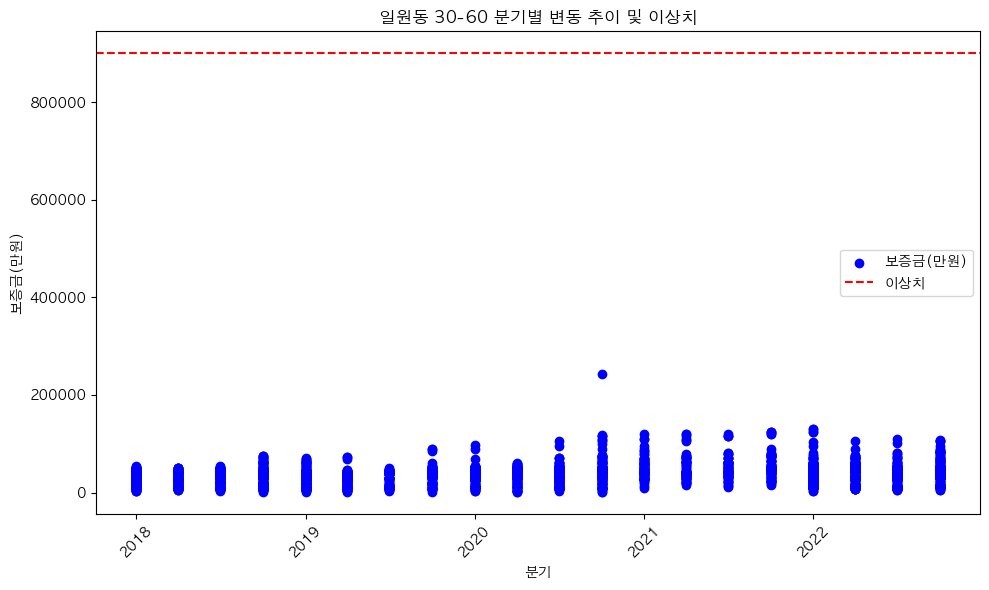

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['분기정리'], filtered_df['보증금(만원)'], marker='o', color='blue', label='보증금(만원)')
plt.axhline(y=900000, color='red', linestyle='--', label='이상치')
plt.xlabel('분기')
plt.ylabel('보증금(만원)')
plt.title('일원동 30-60 분기별 변동 추이 및 이상치')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


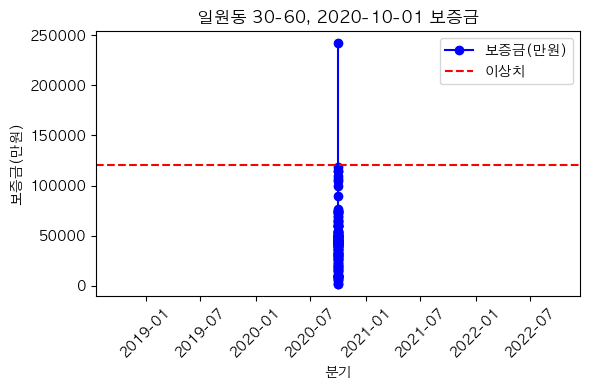

In [62]:
filtered_df = df[(df['행정구_전용면적band'] == '일원동30-60') & (df['분기정리'] == '2020-10-01')]

# 그래프 그리기
plt.figure(figsize=(6, 4))
plt.plot(filtered_df['분기정리'], filtered_df['보증금(만원)'], marker='o', color='blue', linestyle='-', label='보증금(만원)')
plt.axhline(y=120000, color='red', linestyle='--', label='이상치')
plt.xlabel('분기')
plt.ylabel('보증금(만원)')
plt.title('일원동 30-60, 2020-10-01 보증금')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [64]:
df[df['도로명주소_x'] == '서울특별시 강남구 양재대로51길']

,보증금(만원),건축년도,구분,전용면적(㎡),층,도로명주소_x,계약시작,계약종료,계약년월일,건축나이,...,대규모점포 개수,전통시장 개수,역세권 개수,금리,유치원 개수,전용면적band,행정구_전용면적band,층band,분기,분기정리
8085,242000,1986,단독다가구,44.0,3.0,서울특별시 강남구 양재대로51길,NaN,NaN,2020-12-28,37,...,0,0,0,2.59,1,30-60,일원동30-60,3-5,2020Q4,2020-10-01
8084,38000,1986,단독다가구,44.0,3.0,서울특별시 강남구 양재대로51길,NaN,NaN,2020-02-15,37,...,0,0,0,2.52,1,30-60,일원동30-60,3-5,2020Q1,2020-01-01
8096,37000,2019,단독다가구,44.0,3.0,서울특별시 강남구 양재대로51길,NaN,NaN,2019-10-29,4,...,0,0,0,2.50,1,30-60,일원동30-60,3-5,2019Q4,2019-10-01
8069,35000,1986,단독다가구,44.0,3.0,서울특별시 강남구 양재대로51길,NaN,NaN,2018-02-09,37,...,0,0,0,3.46,1,30-60,일원동30-60,3-5,2018Q1,2018-01-01
8070,35000,1986,단독다가구,44.0,3.0,서울특별시 강남구 양재대로51길,NaN,NaN,2018-02-09,37,...,0,0,0,3.46,1,30-60,일원동30-60,3-5,2018Q1,2018-01-01
8066,33000,1988,단독다가구,44.0,3.0,서울특별시 강남구 양재대로51길,NaN,NaN,2018-10-12,35,...,0,0,0,3.31,1,30-60,일원동30-60,3-5,2018Q4,2018-10-01
8072,31500,1988,단독다가구,44.0,3.0,서울특별시 강남구 양재대로51길,NaN,NaN,2018-03-24,35,...,0,0,0,3.45,1,30-60,일원동30-60,3-5,2018Q1,2018-01-01
8095,30000,1988,단독다가구,44.0,3.0,서울특별시 강남구 양재대로51길,NaN,NaN,2019-07-12,35,...,0,0,0,2.64,1,30-60,일원동30-60,3-5,2019Q3,2019-07-01
8083,27000,1986,단독다가구,44.0,3.0,서울특별시 강남구 양재대로51길,NaN,NaN,2020-05-16,37,...,0,0,0,2.52,1,30-60,일원동30-60,3-5,2020Q2,2020-04-01
8093,27000,1987,단독다가구,44.0,3.0,서울특별시 강남구 양재대로51길,NaN,NaN,2019-11-12,36,...,0,0,0,2.45,1,30-60,일원동30-60,3-5,2019Q4,2019-10-01


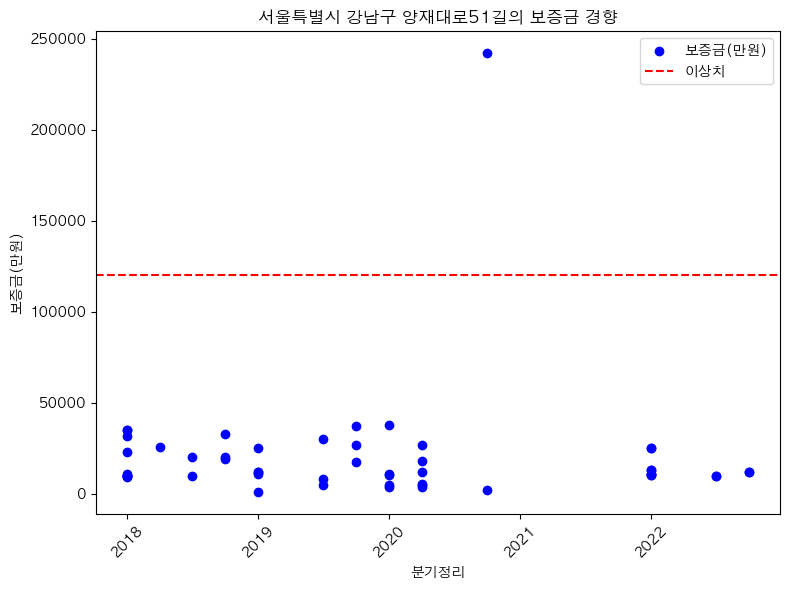

In [70]:
filtered_df = df[df['도로명주소_x'] == '서울특별시 강남구 양재대로51길']

# 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['분기정리'], filtered_df['보증금(만원)'], color='blue', label='보증금(만원)')
plt.axhline(y=120000, color='red', linestyle='--', label='이상치')
plt.xlabel('분기정리')
plt.ylabel('보증금(만원)')
plt.title('서울특별시 강남구 양재대로51길의 보증금 경향')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [72]:
# 이상한놈이었군 뭘까...이런집에서 전세 값이 20억?
temp_df = df[df['도로명주소_x'] == '서울특별시 강남구 양재대로51길']
temp_df.describe()

,보증금(만원),건축년도,전용면적(㎡),층,건축나이,Latitude,Longitude,행정구코드,스타벅스 개수_y,미쉐린 개수,맥도날드 개수,대규모점포 개수,전통시장 개수,역세권 개수,금리,유치원 개수
count,52.000000,52.000000,52.0,52.0,52.000000,5.200000e+01,5.200000e+01,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.000000,52.000000
mean,20067.307692,1988.288462,44.0,3.0,34.711538,3.749182e+01,1.270866e+02,11.0,0.0,0.0,0.0,0.0,0.0,0.0,3.212115,1.115385
std,32885.061101,5.478430,0.0,0.0,5.478430,2.152425e-14,8.609700e-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.631333,0.322603
min,1000.000000,1986.000000,44.0,3.0,4.000000,3.749182e+01,1.270866e+02,11.0,0.0,0.0,0.0,0.0,0.0,0.0,2.450000,1.000000
25%,10000.000000,1986.000000,44.0,3.0,35.750000,3.749182e+01,1.270866e+02,11.0,0.0,0.0,0.0,0.0,0.0,0.0,2.550000,1.000000
50%,12000.000000,1987.000000,44.0,3.0,36.000000,3.749182e+01,1.270866e+02,11.0,0.0,0.0,0.0,0.0,0.0,0.0,3.290000,1.000000
75%,25000.000000,1987.250000,44.0,3.0,37.000000,3.749182e+01,1.270866e+02,11.0,0.0,0.0,0.0,0.0,0.0,0.0,3.475000,1.000000
max,242000.000000,2019.000000,44.0,3.0,37.000000,3.749182e+01,1.270866e+02,11.0,0.0,0.0,0.0,0.0,0.0,0.0,4.740000,2.000000


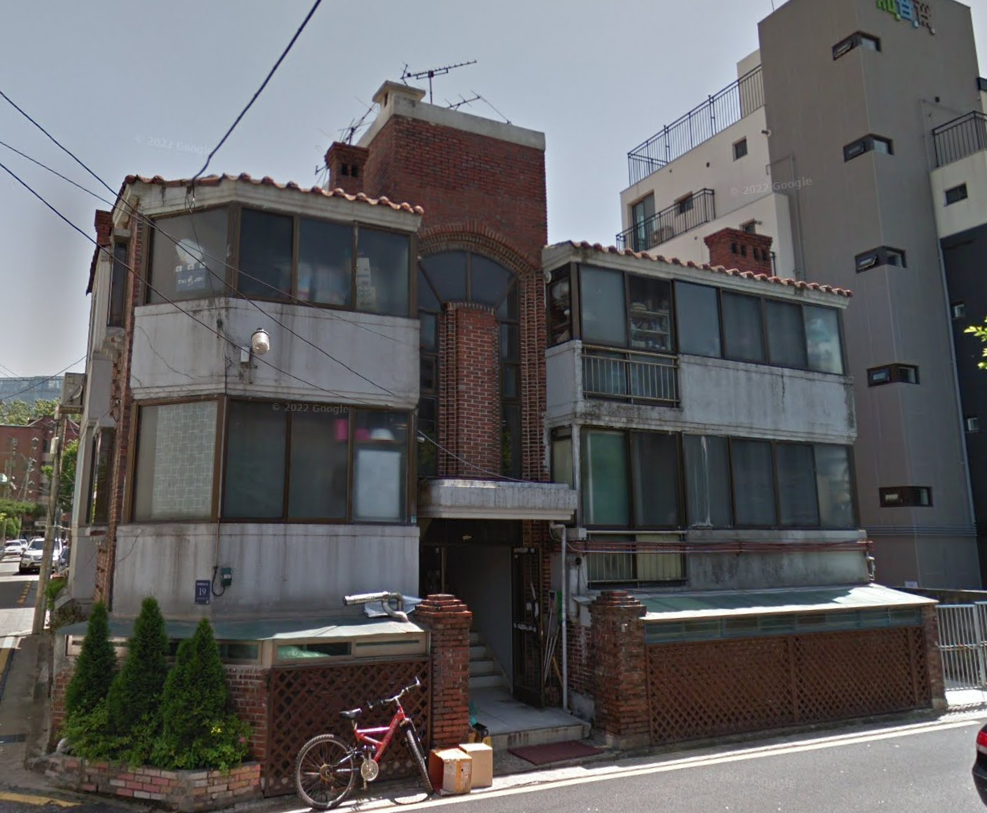

# 연도별 가장 비쌌던 아파트

In [26]:
yearly_dfs = {}
for year in range(2018, 2023):
    year_df = df[df['분기'].dt.year == year]
    yearly_dfs[year] = year_df

# Create a new DataFrame with the highest guarantees for each year
highest_guarantees = pd.DataFrame(columns=df.columns)
for year, year_df in yearly_dfs.items():
    highest_row = year_df[year_df['보증금(만원)'] == year_df['보증금(만원)'].max()]
    highest_guarantees = highest_guarantees.append(highest_row)

highest_guarantees 

,보증금(만원),건축년도,구분,전용면적(㎡),층,도로명주소_x,계약시작,계약종료,계약년월일,건축나이,...,대규모점포 개수,전통시장 개수,역세권 개수,금리,유치원 개수,전용면적band,행정구_전용면적band,층band,분기,분기정리
37798,400000,2012,아파트,237.74,3.0,서울특별시 강남구 삼성로 636,NaN,NaN,2018-02-02,11,...,0,0,2,3.46,1,120+,삼성동120+,3-5,2018Q1,2018-01-01
86105,450000,2006,아파트,244.32,16.0,서울특별시 강남구 압구정로79길 87,NaN,NaN,2019-07-09,17,...,0,0,0,2.64,0,120+,청담동120+,10-67,2019Q3,2019-07-01
64272,450000,2019,아파트,271.99,1.0,서울특별시 강남구 압구정로71길 28,NaN,NaN,2019-03-25,4,...,1,0,0,3.04,1,120+,청담동120+,0-3,2019Q1,2019-01-01
86115,400000,2019,아파트,197.73,2.0,서울특별시 강남구 학동로81길 28,NaN,NaN,2020-07-16,4,...,0,0,1,2.45,2,120+,청담동120+,0-3,2020Q3,2020-07-01
67095,400000,2007,연립다세대,273.98,3.0,서울특별시 강남구 학동로44길 36,NaN,NaN,2020-04-17,16,...,0,1,1,2.58,2,120+,논현동120+,3-5,2020Q2,2020-04-01
61206,930000,2020,아파트,273.96,14.0,서울특별시 강남구 압구정로79길 88,2021-11-01,2023-11-01,2021-11-12,3,...,0,0,0,3.51,0,120+,청담동120+,10-67,2021Q4,2021-10-01
61207,1100000,2020,아파트,273.96,18.0,서울특별시 강남구 압구정로79길 88,2022-10-01,2024-10-01,2022-10-13,3,...,0,0,0,4.82,0,120+,청담동120+,10-67,2022Q4,2022-10-01
